科研绘图SciencePlots库
## 安装

In [ ]:
!pip3 install SciencePlots

**tips**: 

SciencePlots库需要电脑安装LaTex，其中
- MacOS电脑安装MacTex  https://www.tug.org/mactex/
- Windows电脑安装MikTex  https://miktex.org/

## 初始化绘图样式
在SciencePlots库中科研绘图样式都是用的science

In [1]:
import matplotlib.pyplot as plt

plt.style.use('science')

当然你也可以同时设置多个样式

In [2]:
plt.style.use(['science', 'ieee'])

在上面的代码中， **ieee** 会覆盖掉 **science** 中的某些参数（列宽、字号等）， 以达到符合 **IEEE**论文的绘图要求

如果要临时使用某种绘图样式，科研使用如下语法

In [ ]:
#注意，此处是语法示例，
#如要运行， 请提前准备好x和y的数据
with plt.style.context(['science', 'ieee']):
    plt.figure()
    plt.plot(x, y)
    plt.show()

## 案例

定义函数曲线， 准备数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def function(x, p):
    return x ** (2 * p + 1) / (1 + x ** (2 * p))

pparam = dict(xlabel='Voltage (mV)', ylabel='Current ($\mu$A)')

x = np.linspace(0.75, 1.25, 201)

### science样式

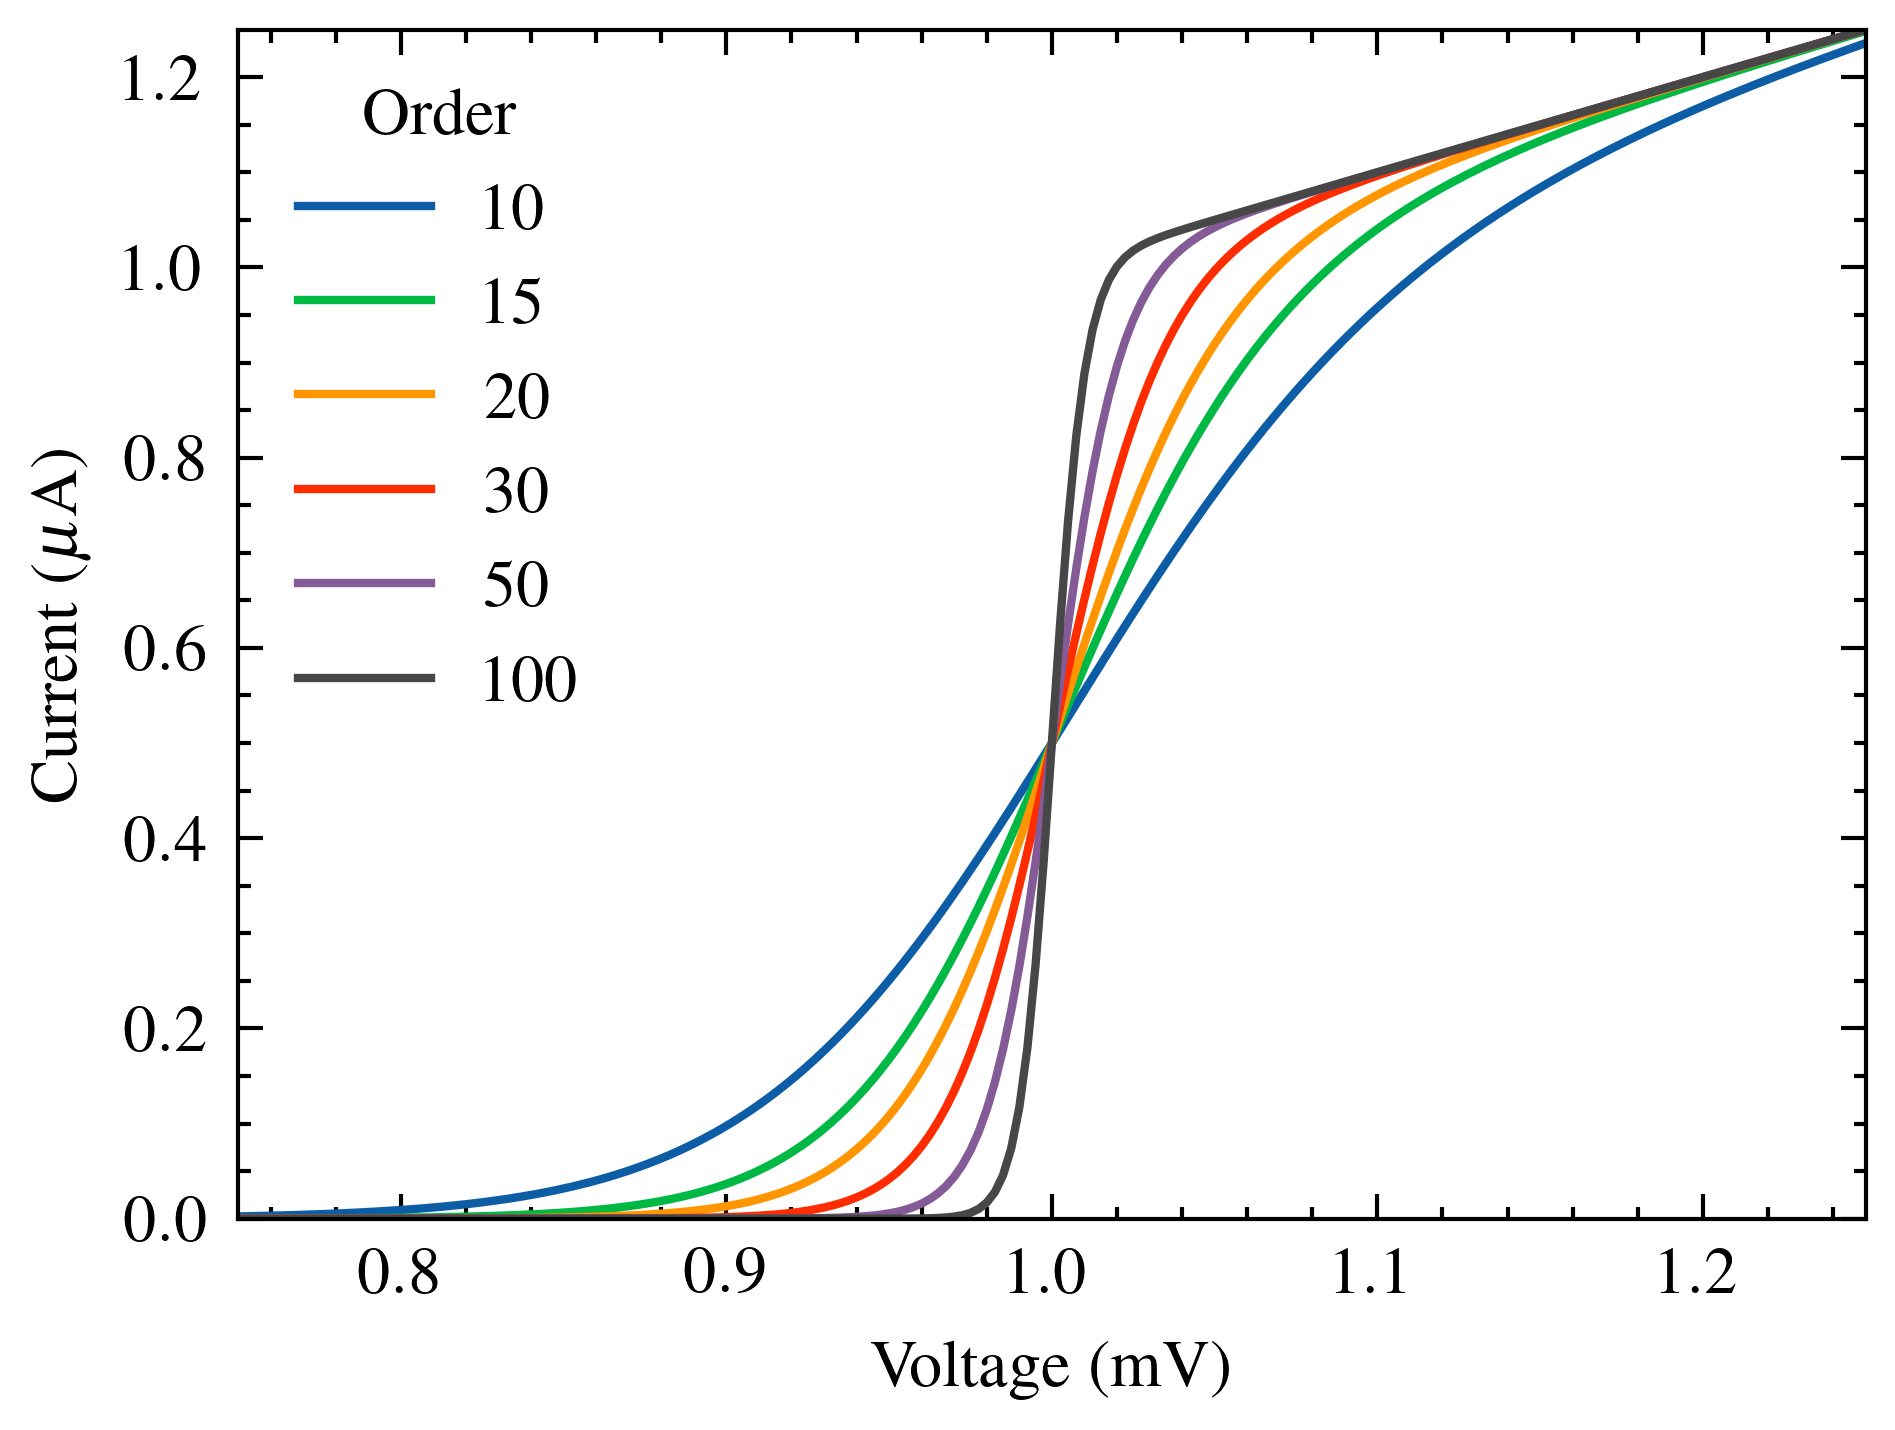

In [7]:
with plt.style.context(['science']):
    fig, ax = plt.subplots()
    for p in [10, 15, 20, 30, 50, 100]:
        ax.plot(x, function(x, p), label=p)
    ax.legend(title='Order')
    ax.autoscale(tight=True)
    ax.set(**pparam)
    fig.savefig('figures/fig1.pdf')
    fig.savefig('figures/fig1.jpg', dpi=300)

### science+ieee样式
针对IEEE论文准备的**science+ieee**样式

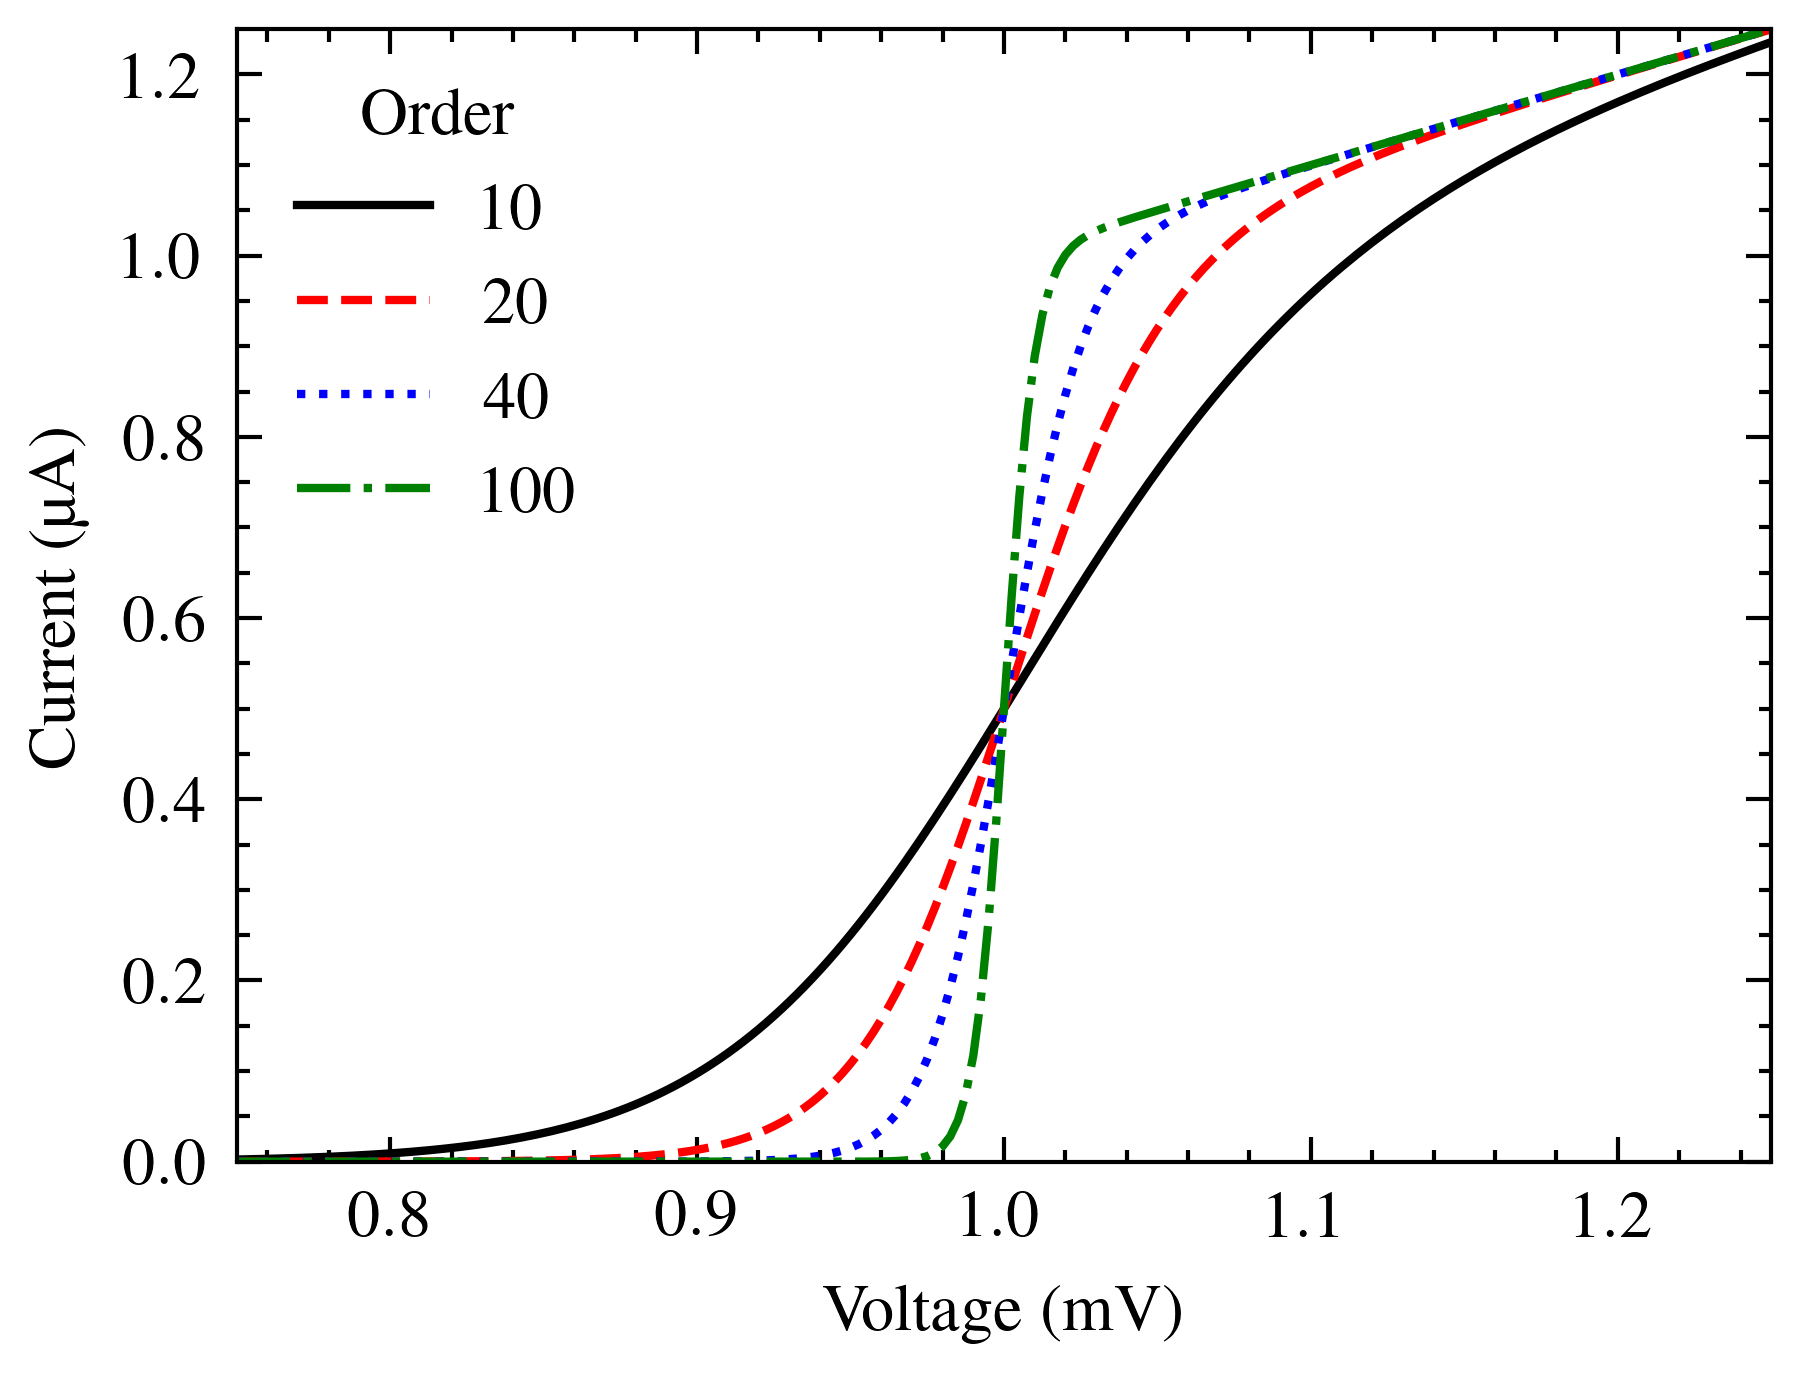

In [9]:
with plt.style.context(['science', 'ieee']):
    fig, ax = plt.subplots()
    for p in [10, 20, 40, 100]:
        ax.plot(x, function(x, p), label=p)
    ax.legend(title='Order')
    ax.autoscale(tight=True)
    ax.set(**pparam)
    # Note: $\mu$ doesn't work with Times font (used by ieee style)
    ax.set_ylabel(r'Current (\textmu A)')  
    fig.savefig('figures/fig2a.pdf')
    fig.savefig('figures/fig2a.jpg', dpi=300)

### science+scatter样式
**IEEE** 要求图形以黑白打印时必须可读。 **ieee** 样式还可以将图形宽度设置为适合IEEE论文的一列。


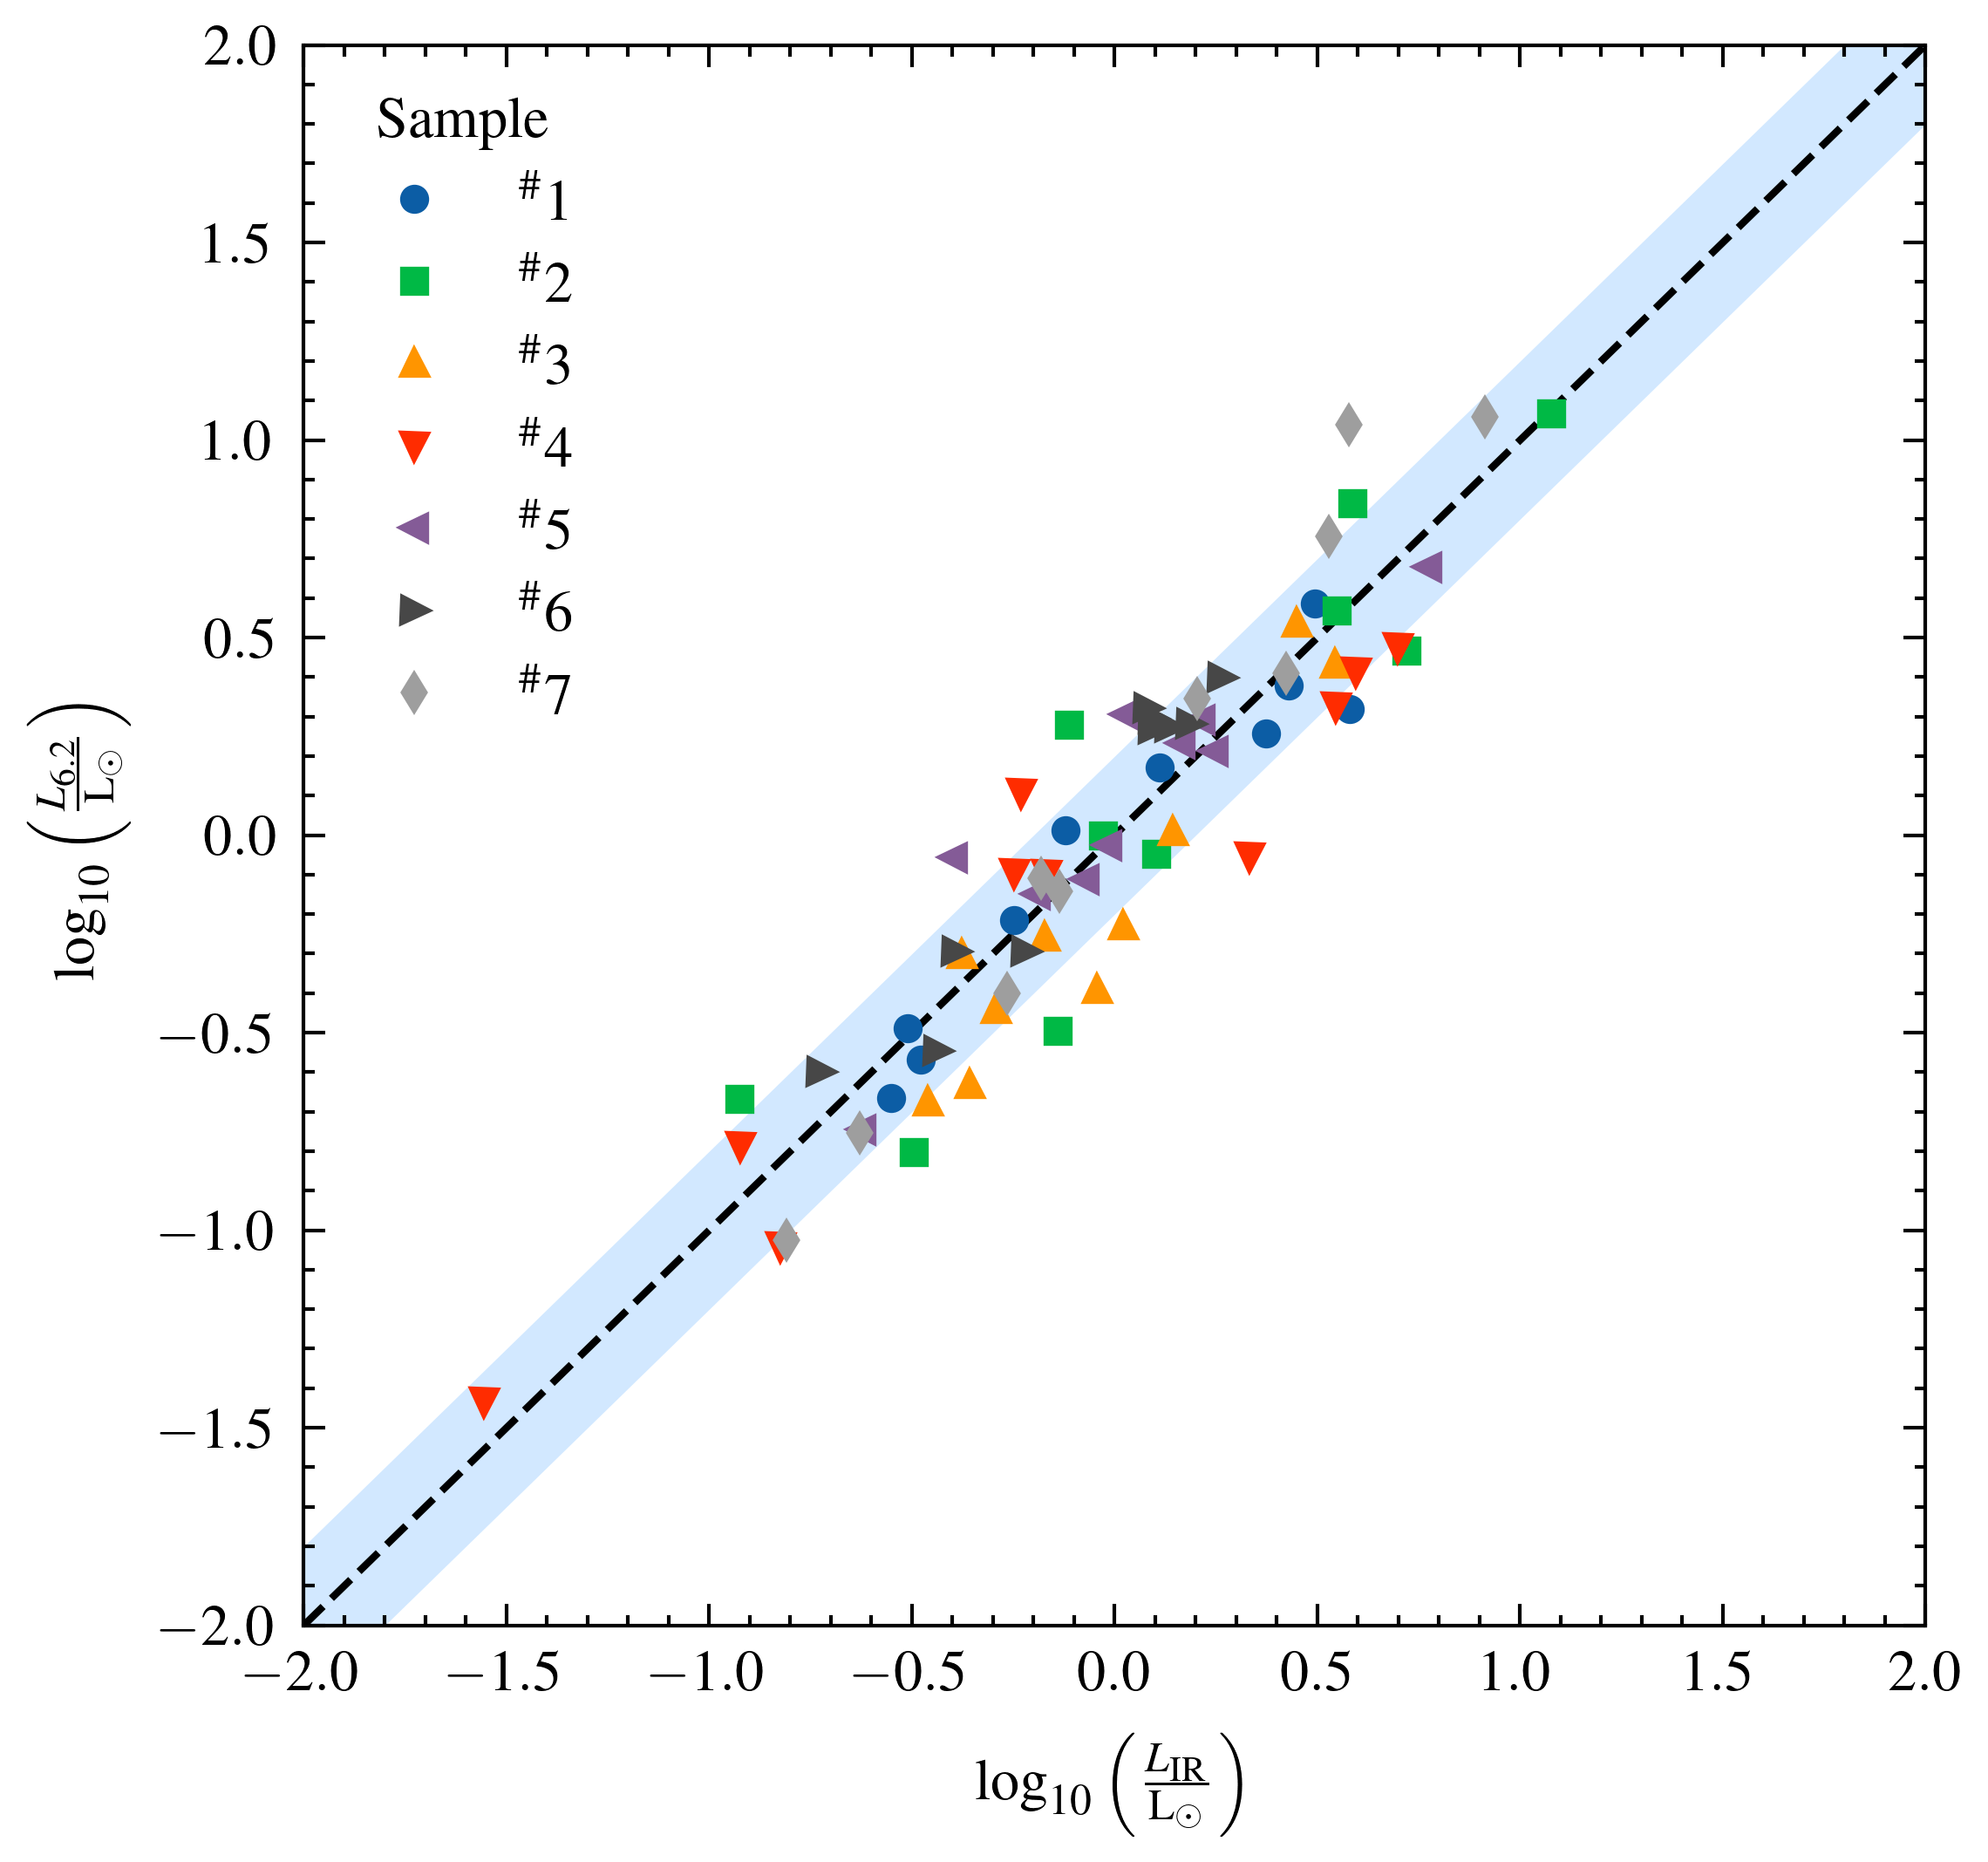

In [11]:
with plt.style.context(['science', 'scatter']):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.plot([-2, 2], [-2, 2], 'k--')
    ax.fill_between([-2, 2], [-2.2, 1.8], [-1.8, 2.2],
                    color='dodgerblue', alpha=0.2, lw=0)
    for i in range(7):
        x1 = np.random.normal(0, 0.5, 10)
        y1 = x1 + np.random.normal(0, 0.2, 10)
        ax.plot(x1, y1, label=r"$^\#${}".format(i+1))
    ax.legend(title='Sample', loc=2)
    xlbl = r"$\log_{10}\left(\frac{L_\mathrm{IR}}{\mathrm{L}_\odot}\right)$"
    ylbl = r"$\log_{10}\left(\frac{L_\mathrm{6.2}}{\mathrm{L}_\odot}\right)$"
    ax.set_xlabel(xlbl)
    ax.set_ylabel(ylbl)
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    fig.savefig('figures/fig3.pdf')
    fig.savefig('figures/fig3.jpg', dpi=300)

### dark_background +science+high-vis
您还可以将这些样式与Matplotlib随附的其他样式结合使用。 例如，dark_background +science+high-vis样式：

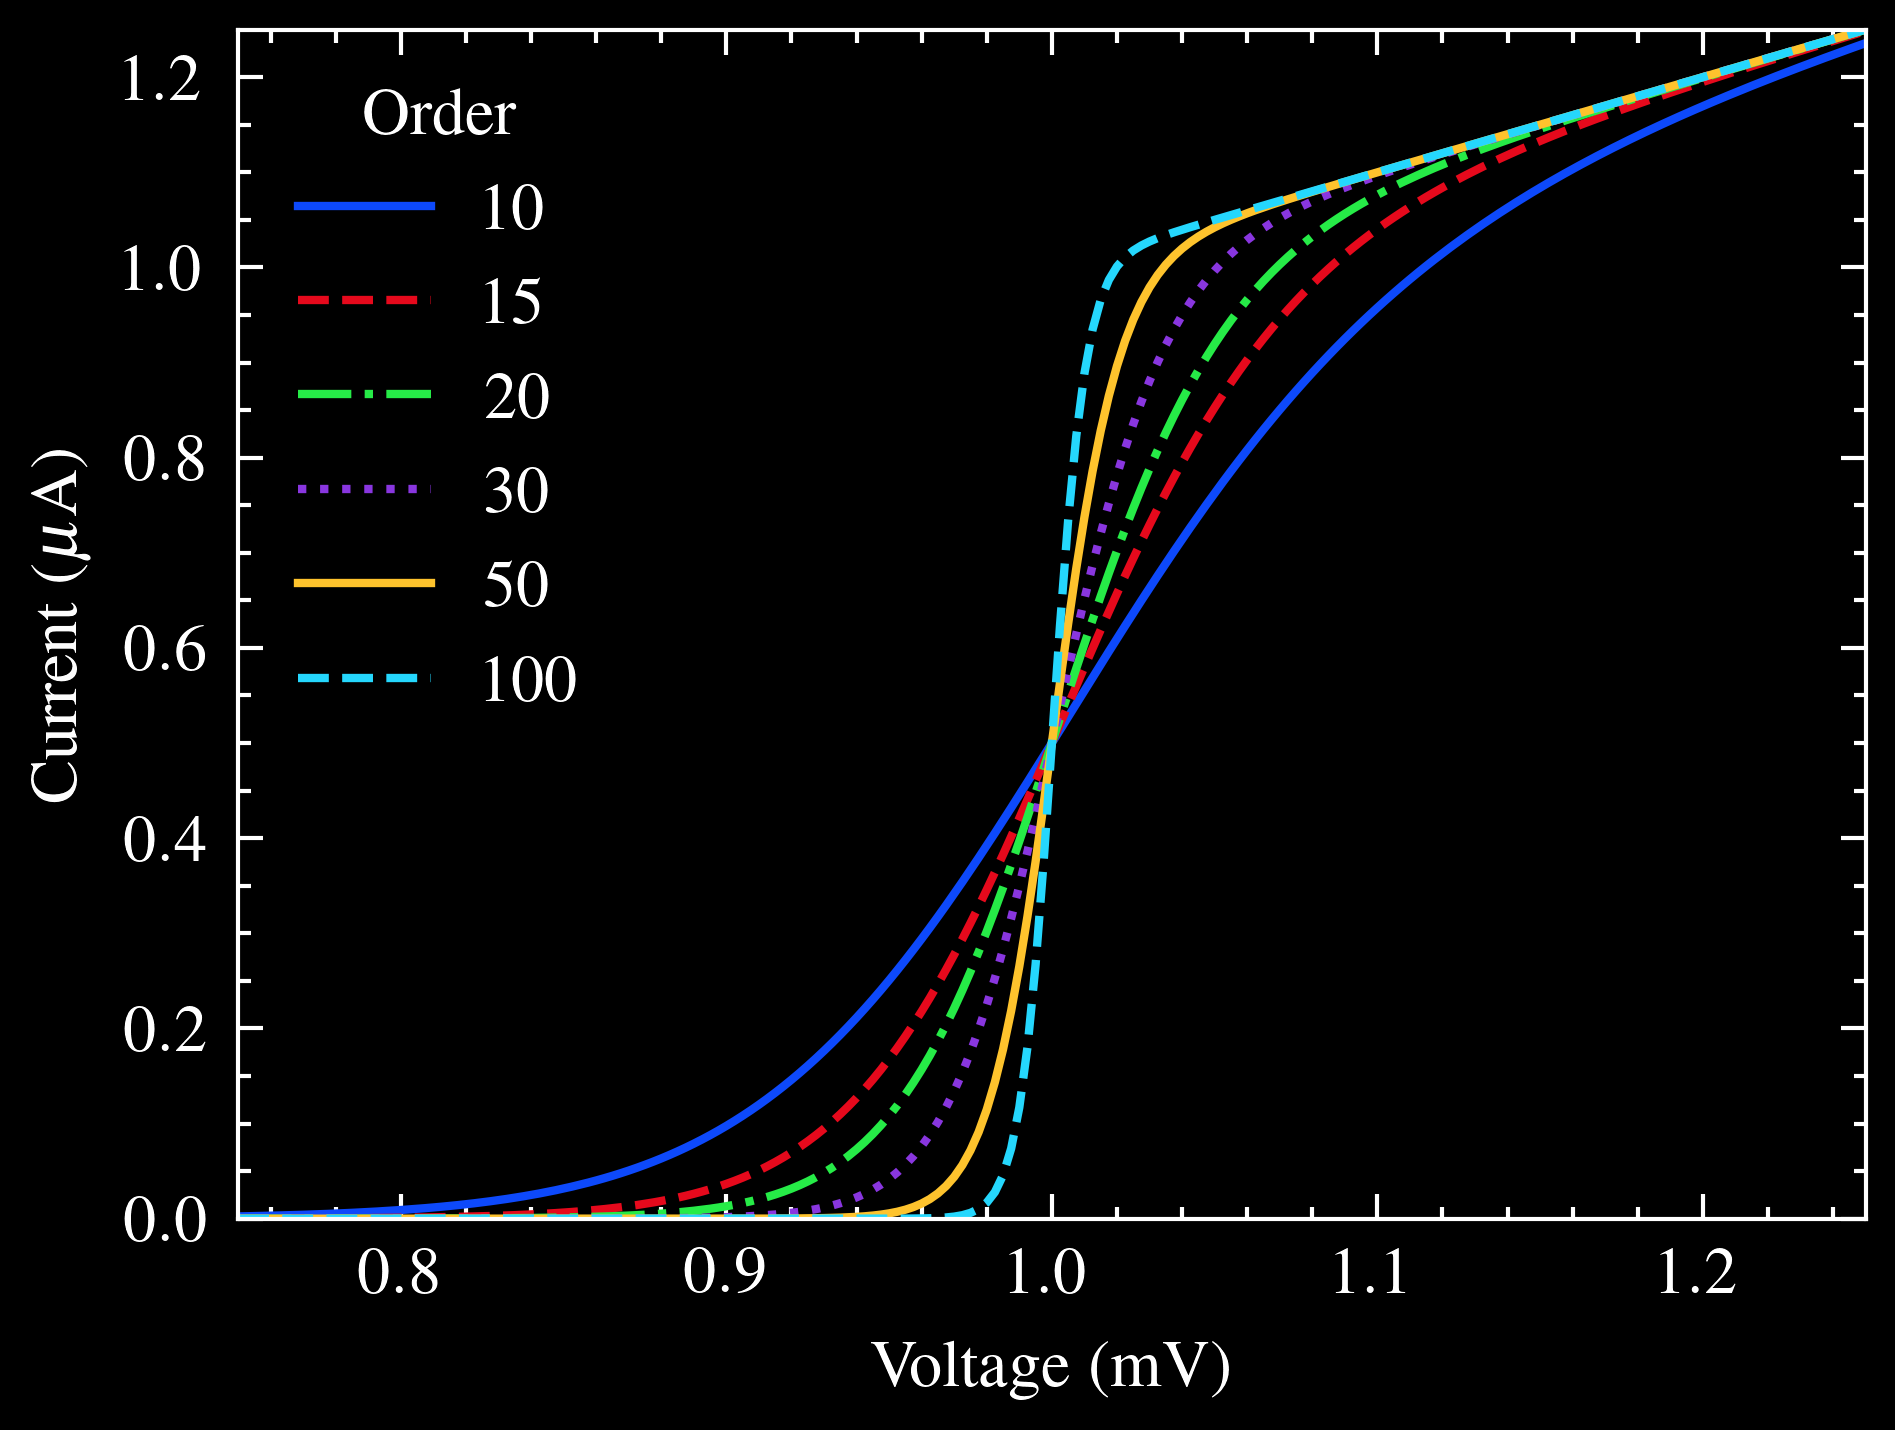

In [12]:
with plt.style.context(['dark_background', 'science', 'high-vis']):
    fig, ax = plt.subplots()
    for p in [10, 15, 20, 30, 50, 100]:
        ax.plot(x, function(x, p), label=p)
    ax.legend(title='Order')
    ax.autoscale(tight=True)
    ax.set(**pparam)
    fig.savefig('figures/fig5.pdf')
    fig.savefig('figures/fig5.jpg', dpi=300)